In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sbn
import sys 
import os

# Set global parameters 
pd.set_option("display.precision", 2)

import warnings
warnings.filterwarnings('ignore')

import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt

In [2]:
# Read all the dataframes

path = os.path.join('result_dfs', 'df_sudokus_4x4_par.csv')
df_4x4_1000 = pd.read_csv(path )
df_4x4_1000.name = '4x4_1000'

path = os.path.join('result_dfs', 'df_sudokus_9x9_par.csv')
df_9x9_1000 = pd.read_csv(path )
df_9x9_1000.name = '9x9_1000'

path = os.path.join('result_dfs', 'df_top870.sdk_par.csv')
df_9x9_dh = pd.read_csv(path )
df_9x9_dh.name = '9x9_damnhard'

# Make a list of which df's to parse (to make lists readable). Later we modify those dfs
list_dfs = [df_4x4_1000, df_9x9_1000, df_9x9_dh]

In [3]:
def parse_list(l):
    return list(map(int, l[1:-1].split(',')))
def parse_splits(x):
    if x=='[]':
        return 0
    else:
        return int(x)

for df in list_dfs:
    df.drop(columns=['Unnamed: 0'],inplace=True)
    columns_lists = df.filter(like='list').columns
    for column in columns_lists:
        df[column] = df[column].apply(parse_list)
    # we onky need to parse columns with splits for cdcl 
    columns_splits = df.filter(like='splits')
    for column in columns_splits.columns:
        df[column] = df[column].apply(parse_splits).astype(int)

In [4]:
# Print the summary statistics 
for df in list_dfs:
    print('Summary Statistics for: %s \n' % df.name)
    print(df.describe())
    print()
    print()

Summary Statistics for: 4x4_1000 

       DP_splits  DP_moms_splits  cdcl_splits  cdcl_moms_splits  \
count     1000.0         1000.00      1000.00           1000.00   
mean         0.7            0.79         0.45              0.41   
std          2.4            2.61         1.51              1.39   
min          0.0            0.00         0.00              0.00   
25%          0.0            0.00         0.00              0.00   
50%          0.0            0.00         0.00              0.00   
75%          0.0            0.00         0.00              0.00   
max         14.0           18.00        10.00              9.00   

       cdcl_chron_splits  cdcl_chron_moms_splits  sudoku_given_clauses  
count            1000.00                 1000.00               1000.00  
mean                0.64                    0.56                  4.93  
std                 2.20                    1.95                  1.00  
min                 0.00                    0.00                  4.0

### Visualization 

#### Plot the box plots for number of splits

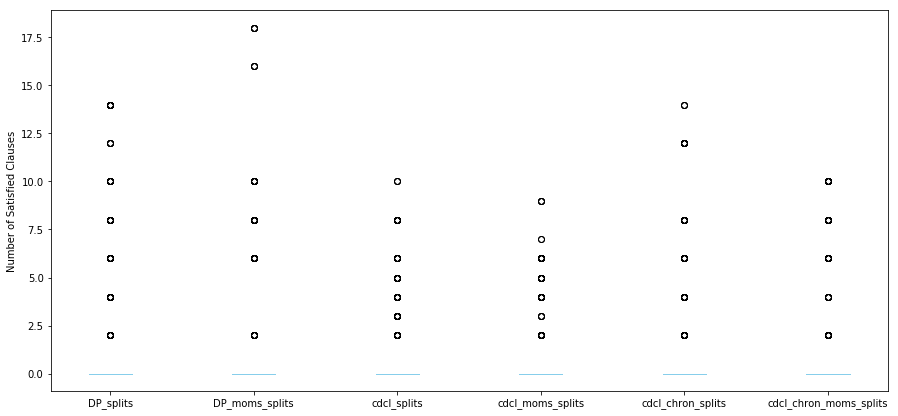

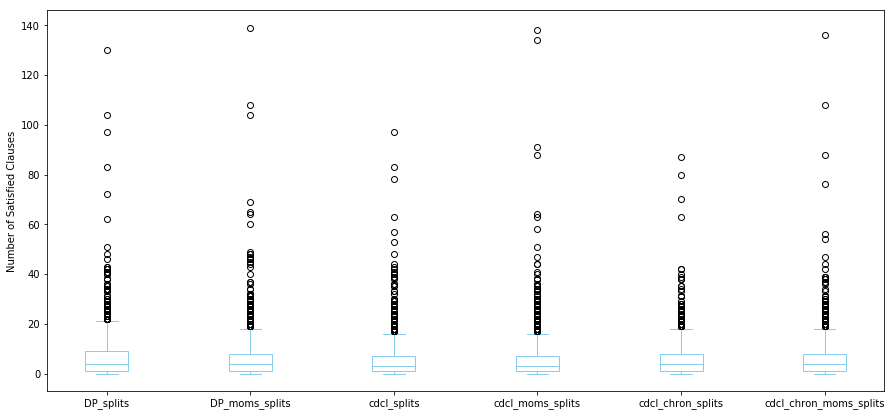

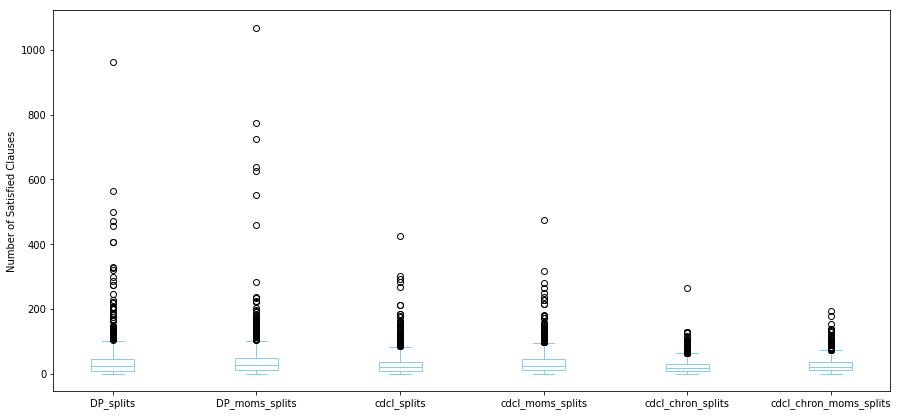

In [5]:
# With outliers

def draw_plot(data, offset, edge_color, fill_color):
    """ offset parameter shift the box plot up or down """
    pos = np.arange(data.shape[1]) 
    bp = ax.boxplot(data, positions= pos, widths=0.3, patch_artist=True, manage_xticks=False)
    for element in ['boxes', 'whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

for df in list_dfs:
    fig, ax = plt.subplots(figsize=(15,7))
    data = df.filter(like='splits')
    draw_plot(data.values, 0, "skyblue", "white")
    plt.xticks(np.arange(len(data.columns)),list(data.columns))
    plt.ylabel("Number of Satisfied Clauses")

    plt.show()
    plt.close()

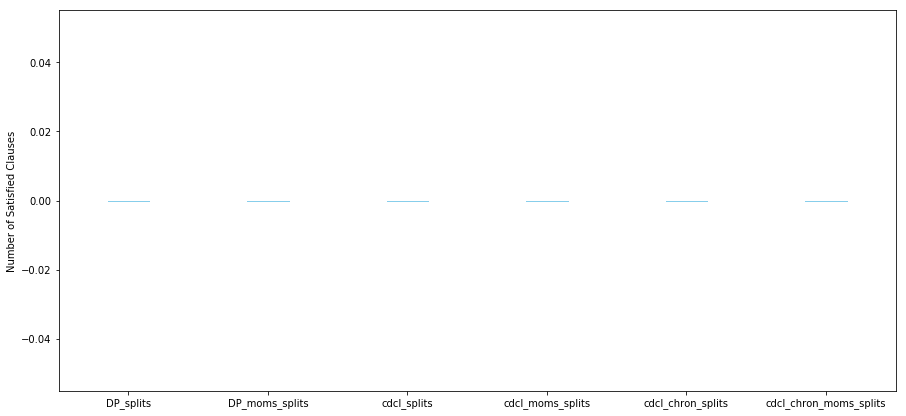

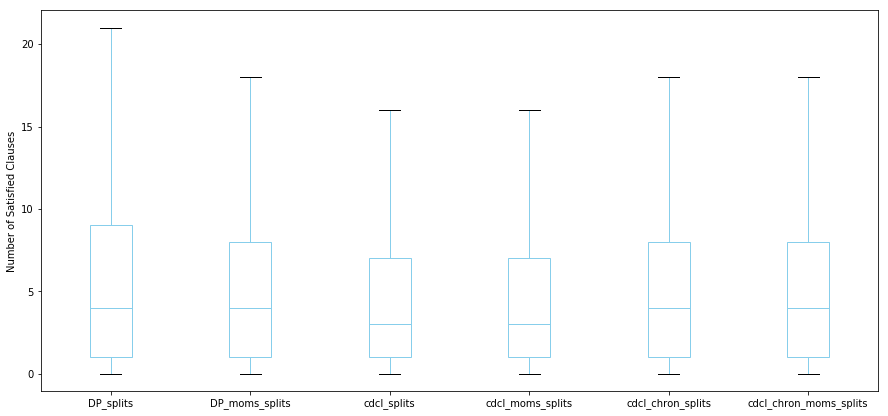

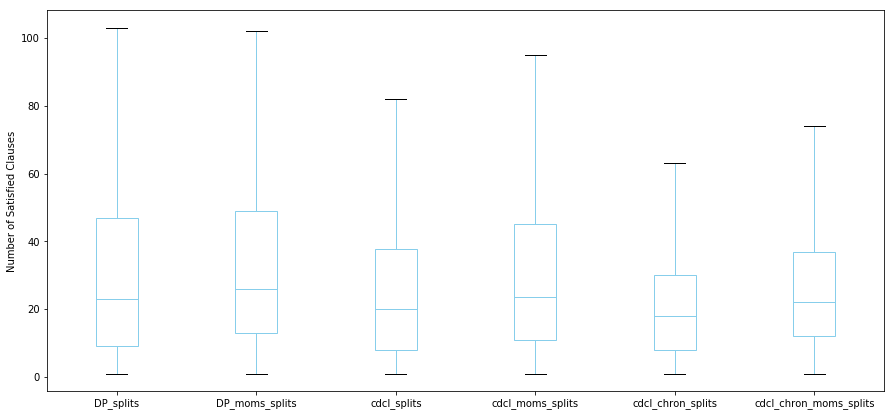

In [6]:
# Without outliers

import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt

def draw_plot(data, offset,edge_color, fill_color):
    """ offset parameter shift the box plot up or down """
    pos = np.arange(data.shape[1])  + offset 
    bp = ax.boxplot(data, positions= pos, widths=0.3, patch_artist=True,showfliers=False, manage_xticks=True)
    for element in ['boxes', 'whiskers', 'medians']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

for df in list_dfs:
    fig, ax = plt.subplots(figsize=(15,7))
    data = df.filter(like='splits')
    draw_plot(data.values, 0, "skyblue", "white")
    plt.xticks(np.arange(len(data.columns)),list(data.columns))
    plt.ylabel("Number of Satisfied Clauses")

    plt.show()
    plt.close()

#### Plot the number of 'total' satisfied split per run 

In [7]:
# Print 'total' number of satisfied clauses per split
#     * Select n number of splits to visualize, say n = 200

n = 2000 # need all splits
total_sat_clauses_dict = dict()

for df in list_dfs:
    df_sat_clauses = pd.DataFrame(index=list(df.index))
    columns_lists = df.filter(like='list').columns 
    for column in columns_lists:
        array = list(map(list,df[column].values.tolist()))
        matrix = np.full([n], np.nan)
        for row in array:
            # limit the number of splits taken for evalaution=taking-the-mean/taking-the-sum
            n_fill_in = ((n - len(row))>0)*(n - len(row)) or 0
            array_modified = np.hstack((np.array(row[:n]) , np.full([n_fill_in],np.nan)))
            matrix = np.vstack((matrix, array_modified))
    
        # take the average for each column in matrix to arrive to avg # of sat clauses for that split=column
        sum_array = np.nansum(matrix, axis=1)
        df_sat_clauses[column] = sum_array[1:]
    total_sat_clauses_dict[df.name] = df_sat_clauses 


In [8]:
# Print the summary statistics 
for k,df in total_sat_clauses_dict.items():
    print('Summary Statistics for: %s \n' % k)
    print(df.describe())
    print()
    print()

Summary Statistics for: 4x4_1000 

       DP_list_sat_clauses  DP_moms_list_sat_clauses  cdcl_list_sat_clauses  \
count              1000.00                   1000.00                1000.00   
mean                139.07                    147.31                 127.18   
std                 157.32                    176.47                 118.00   
min                  50.00                     50.00                  51.00   
25%                  64.00                     64.00                  66.00   
50%                  70.00                     70.00                  72.00   
75%                 164.25                    164.25                 166.25   
max                 955.00                   1054.00                 979.00   

       cdcl_moms_list_sat_clauses  cdcl_chron_list_sat_clauses  \
count                     1000.00                      1000.00   
mean                       128.14                       121.88   
std                        119.78                      

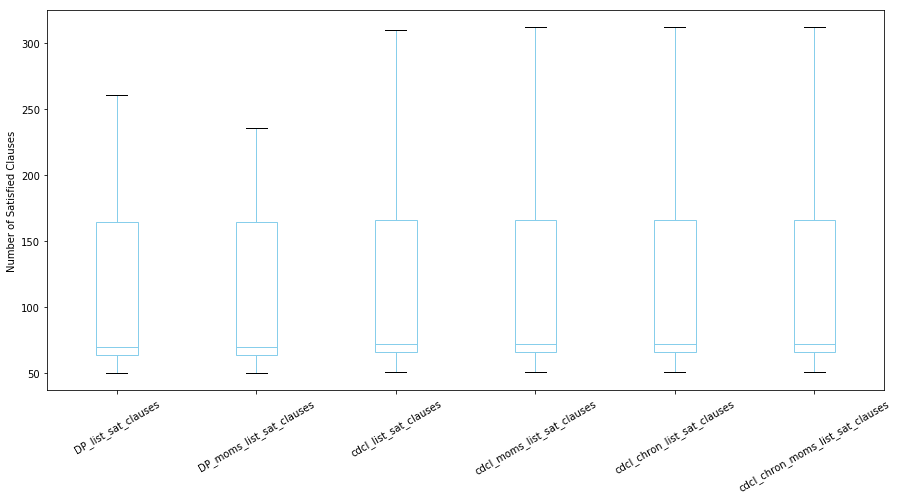

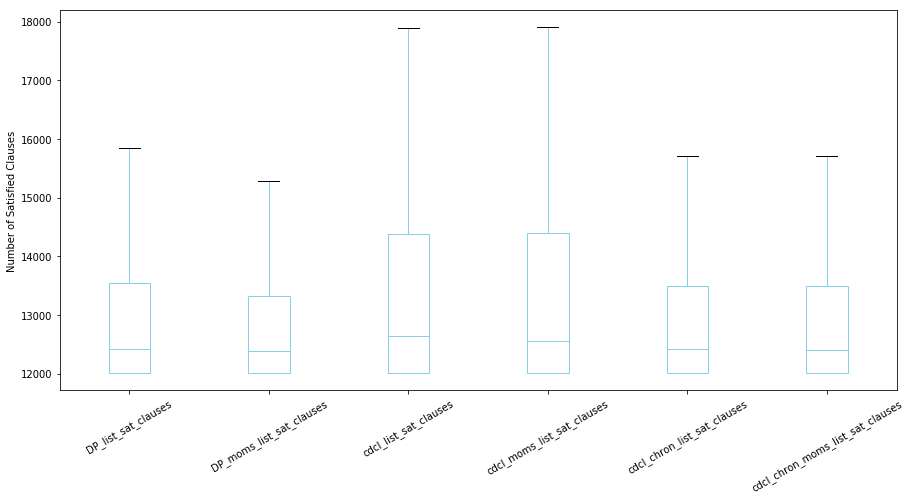

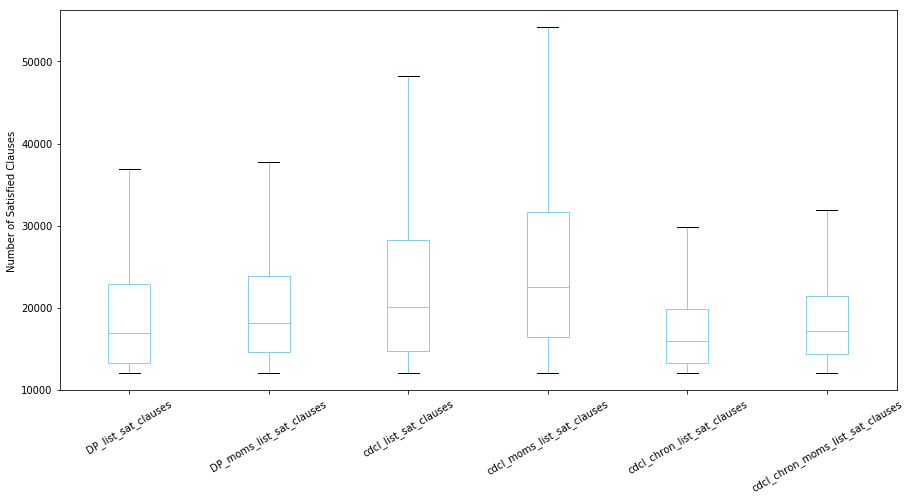

In [9]:
import numpy as np; np.random.seed(1)
import matplotlib.pyplot as plt

def draw_plot(data, offset,edge_color, fill_color):
    """ offset parameter shift the box plot up or down """
    pos = np.arange(data.shape[1])  + offset 
    bp = ax.boxplot(data, positions= pos, widths=0.3, patch_artist=True,showfliers=False, manage_xticks=True)
    for element in ['boxes', 'whiskers', 'medians']:
        plt.setp(bp[element], color=edge_color)
    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)

for k,df in total_sat_clauses_dict.items():
    fig, ax = plt.subplots(figsize=(15,7))
#     data = df.filter(like='splits')
    data = df
    draw_plot(data.values, 0, "skyblue", "white")
    plt.ylabel("Number of Satisfied Clauses")
    plt.xticks(np.arange(len(data.columns)),list(data.columns), rotation=30)

    plt.show()
    plt.close()

#### Plot the number of satisfied clauses per split 

In [10]:
# Print average number of satisfied clauses per split
#     * Select n number of splits to visualize, say n = 200
avg_sat_clauses_dict = dict()

for df in list_dfs:
    columns_lists = list(df.filter(like='list').columns) 
    columns_lists.append('sudoku_given_clauses')
    n = df.drop(columns=columns_lists).max().max()
    columns_lists.pop()
    df_sat_clauses = pd.DataFrame(index=list(range(n)))
    for column in columns_lists:
        array = list(map(list,df[column].values.tolist()))
        matrix = np.full([n], np.nan)
        for row in array:
            # limit the number of splits taken for evalaution=taking-the-mean
            n_fill_in = ((n - len(row))>0)*(n - len(row)) or 0
            array_modified = np.hstack((np.array(row[:n]) , np.full([n_fill_in],np.nan)))
            matrix = np.vstack((matrix, array_modified))
    
        # take the average for each column in matrix to arrive to avg # of sat clauses for that split=column
        avg_array = np.mean(np.nan_to_num(matrix), axis=0)
        df_sat_clauses[column] = avg_array
        df_sat_clauses.name = n 
    avg_sat_clauses_dict[df.name] = df_sat_clauses

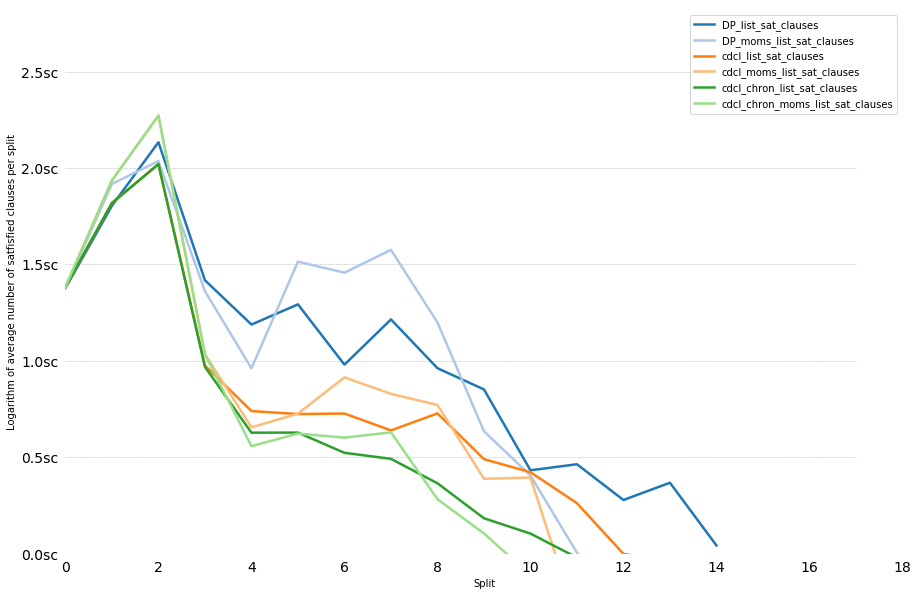

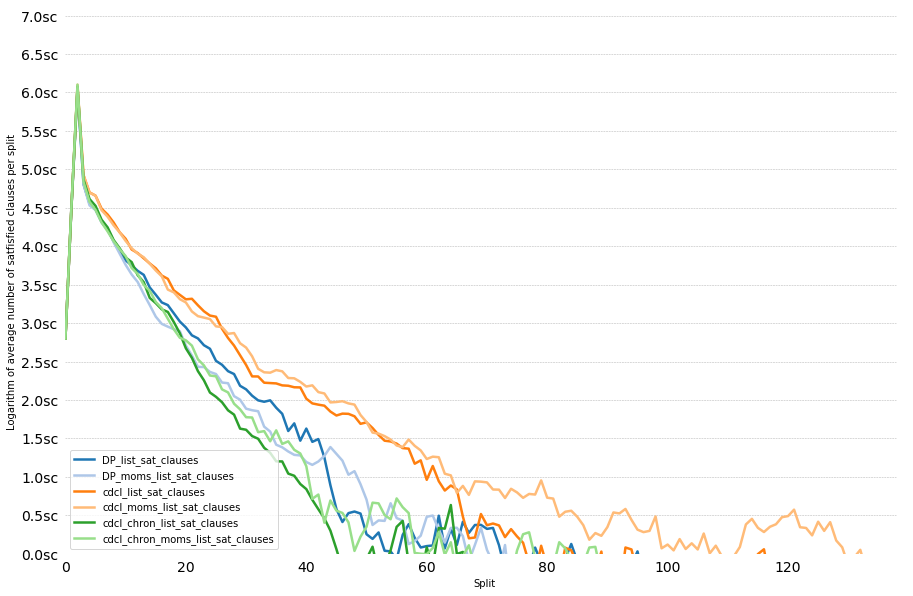

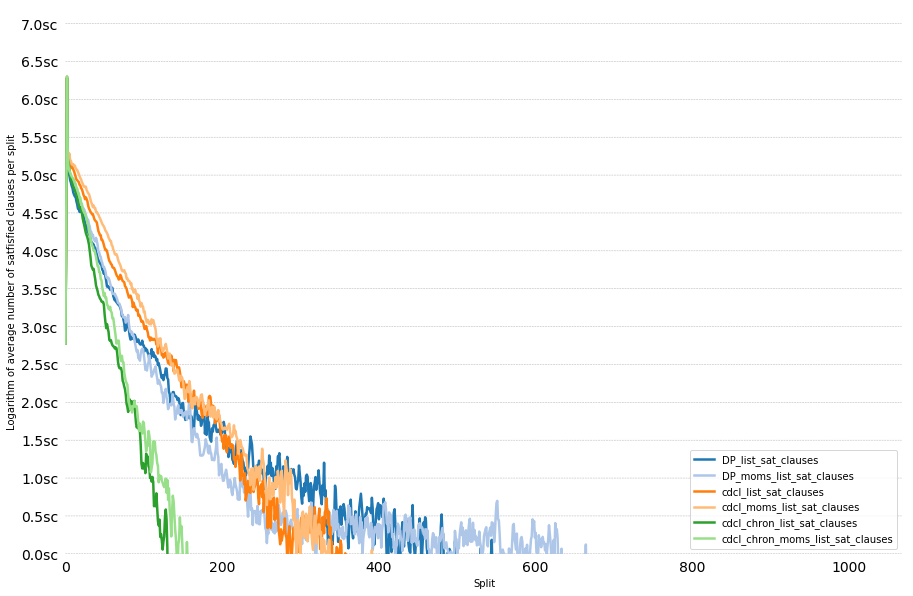

In [11]:
# try the logarithm to better visialize  ===== !!! =====

# Make interactive
# %matplotlib qt

# Run only once (!)
for k, df in  avg_sat_clauses_dict.items():
    for column in df.columns:
        # log 
        df[column] = np.log(df[column])
        # weighted
        df[column] = np.convolve(df[column].values, [0.3,0.3,0.3])[:-2]
    # df.name does not store the name anymore, 
    #    it stores the highest split for which average sat clauses are available 
    n =  df.name # + 20
    
    # visualization wont work with nans
    df = df.fillna(value=0.0)

    # These are the "Tableau 20" colors as RGB.    
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
                 (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
                 (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
                 (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
                 (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.)    

    # You typically want your plot to be ~1.33x wider than tall. This plot is a rare    
    # exception because of the number of lines being plotted on it.    
    # Common sizes: (10, 7.5) and (12, 9)    
    plt.figure(figsize=(15, 10))    

    # Remove the plot frame lines. They are unnecessary chartjunk.    
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    # Ticks on the right and top of the plot are generally unnecessary chartjunk.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()    

    max_sat_clauses = df.max().max() + df.std().max()/2
    y_step = 0.5

    # Limit the range of the plot to only where the data is.    
    # Avoid unnecessary whitespace.    
    plt.ylim(0, max_sat_clauses)    
    plt.xlim(0, n)    

    # Make sure your axis ticks are large enough to be easily read.    
    # You don't want your viewers squinting to read your plot.    
    plt.yticks(np.arange(0, max_sat_clauses, y_step), [str(x) + "sc" for x in np.arange(0, max_sat_clauses, y_step)], fontsize=14)    
    plt.xticks(fontsize=14)    

    # Provide tick lines across the plot to help your viewers trace along    
    # the axis ticks. Make sure that the lines are light and small so they    
    # don't obscure the primary data lines.    
    for y in np.arange(0, max_sat_clauses, y_step):    
        plt.plot(np.arange(0, n), [y] * len(np.arange(0, n)), "--", lw=0.5, color="black", alpha=0.3)    

    # Remove the tick marks; they are unnecessary with the tick lines we just plotted.    
    plt.tick_params(axis="both", which="both", bottom="off", top="off",    
                    labelbottom="on", left="off", right="off", labelleft="on")    

    # Get the names for the legend    
    majors = list(df.columns)

    for rank, column in enumerate(majors):    
        # Plot each line separately with its own color, using the Tableau 20    
        # color set in order.    
        plt.plot(df.index.values,    
                df[column.replace("\n", " ")].values,    
                lw=2.5, color=tableau20[rank], label = column)    

    # you can set the location with addin loc param i.e. loc='upper right'
    plt.legend()   

    plt.ylabel("Logarithm of average number of satfisfied clauses per split")
    plt.xlabel("Split")
